In [2]:
! git clone https://github.com/jennyschilling/project_gss_group11/

Cloning into 'project_gss_group11'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 44 (delta 16), reused 9 (delta 9), pack-reused 26
Receiving objects: 100% (44/44), 24.64 MiB | 21.75 MiB/s, done.
Resolving deltas: 100% (17/17), done.


      adoptus                           immfate             letin1a  \
71012     3.0                   become citizens    reduced a little   
71016     3.0                   become citizens    reduced a little   
71015     3.0                   become citizens  increased a little   
71014     3.0  become permanent legal residents       reduced a lot   
71013     3.0                   become citizens  increased a little   

           letinhsp1      letinasn1   age     sex   race born  
71012      decreased  left the same  65.0    male  white  yes  
71016      decreased  left the same  44.0  female  white  yes  
71015  left the same  left the same  72.0  female  white  yes  
71014  left the same  left the same  56.0  female  white  yes  
71013      decreased  left the same  63.0    male  white  yes  
[65. 44. 72. 56. 63. 62. 35. 50. 39. 24. 27. 53. 36. 48. 20. 61. 42. 46.
 47. 30. 26. 29. 22. 52. 51. 58. 23. 57. 45. 49. 34. 38. 28. 43. 70. 41.
 19. 18. 37. 33. 31. 40. 55. 59. 21. 25. 32

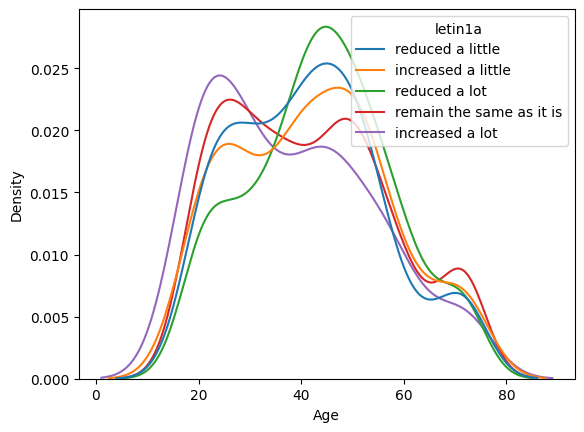

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./project_gss_group11/selected_gss_data.csv', low_memory=False)

# sort the data by adoptus, non-numerical values will go to top which we will remove
df = df.sort_values(by=['adoptus'], ascending=False)

# remove the extra two header rows created from our loop in get_gss.ipynb
df = df.iloc[2:]

# convert age column to numerical data type
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])

# drop age values less than 18 as GSS only surveys adults 18 or older
df.loc[df['age'] < 18, 'age'] = np.nan

# doesn't impact results at all
df = df.drop('parborn', axis = 1)

# drop rows w missing values in crucial columns
df = df.dropna(subset=['age','adoptus', 'immfate', 'letin1a', 'letinhsp1', 'letinasn1'])
print(df.head())

# remove "don't know" categories from adoptus
df = df[~df['adoptus'].isin(['D', 'N', 'I', 'S'])]

# grouped kernel density plot,
#   common_norm allows us to normalize independently for each group
sns.kdeplot(data=df,x='age',hue='letin1a',common_norm=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


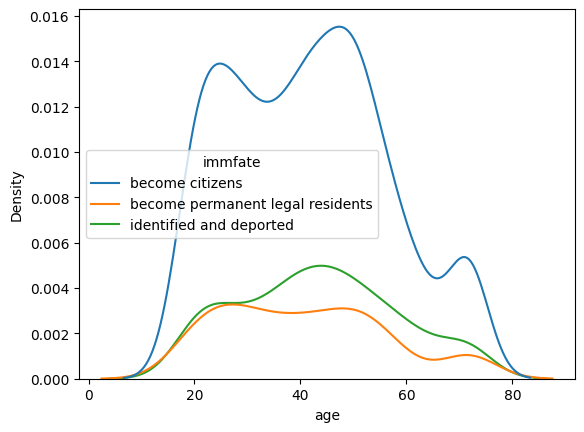

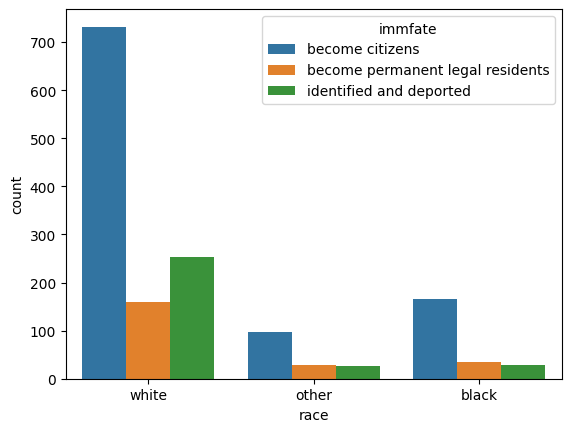

race                                 black     other     white
immfate                                                       
become citizens                   0.724891  0.642384  0.639860
become permanent legal residents  0.148472  0.185430  0.138986
identified and deported           0.126638  0.172185  0.221154 



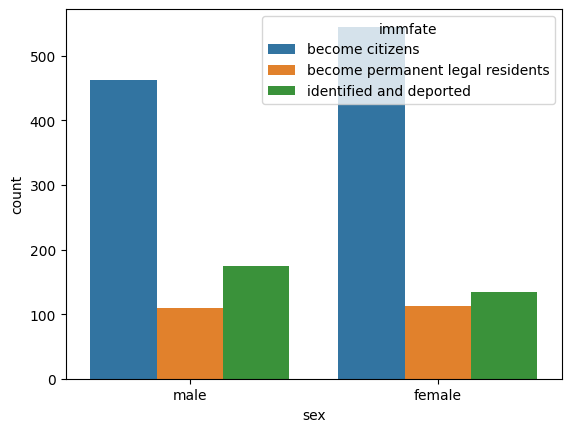

sex                                 female      male
immfate                                             
become citizens                   0.687264  0.619303
become permanent legal residents  0.142497  0.147453
identified and deported           0.170240  0.233244 



In [24]:
### immfate

# vars already cleaned
# immfate by age
sns.kdeplot(data=df, x='age', hue='immfate')
plt.show()

# immfate by race
sns.countplot(data=df, x='race', hue='immfate')
plt.show()
# output may be influenced by amount of each race in each sample
print(pd.crosstab(df['immfate'],df['race'],normalize = 'columns'),'\n')
## white
# 67.0% said become citizens
# 13.9% said become permanent legal residents
# 19.2% said identified and deported
## black
# 73.6% said become citizens
# 16.8% said become permanent legal residents
# 9.6% said identified and deported
## other
# 69.5% said become citizens
# 18.8% said become permanent legal residents
# 11.7% said identified and deported
## ^^ could maybe do a plot with this info

# immfate by sex
sns.countplot(data=df, x='sex', hue='immfate')
plt.show()
print(pd.crosstab(df['immfate'],df['sex'],normalize = 'columns'),'\n')
## male
# 64.8% said become citizens
# 15.2% said become permanent legal residents
# 20.0% said identified and deported
## female
# 71.8% said become citizens
# 14.6% said become permanent legal residents
# 13.6% said identified and deported
## ^^ could maybe do a plot with this info

      adoptus                           immfate             letin1a  \
71012    both                   become citizens    reduced a little   
71016    both                   become citizens    reduced a little   
71015    both                   become citizens  increased a little   
71014    both  become permanent legal residents       reduced a lot   
71013    both                   become citizens  increased a little   

           letinhsp1      letinasn1   age     sex   race born  
71012      decreased  left the same  65.0    male  white  yes  
71016      decreased  left the same  44.0  female  white  yes  
71015  left the same  left the same  72.0  female  white  yes  
71014  left the same  left the same  56.0  female  white  yes  
71013      decreased  left the same  63.0    male  white  yes  


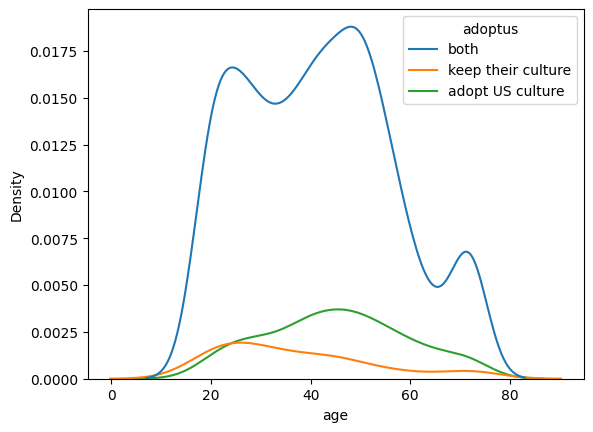

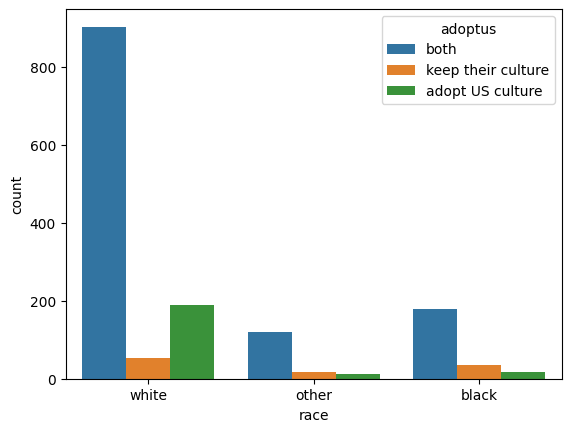

race                   black     other     white
adoptus                                         
adopt US culture    0.069869  0.079470  0.165210
both                0.781659  0.801325  0.789336
keep their culture  0.148472  0.119205  0.045455 



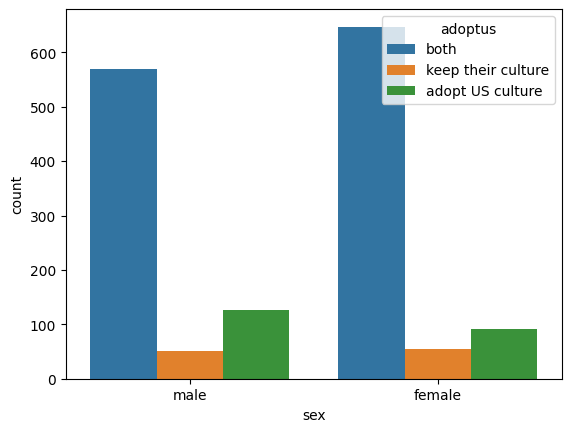

sex                   female      male
adoptus                               
adopt US culture    0.114754  0.168901
both                0.815889  0.762735
keep their culture  0.069357  0.068365 



In [25]:
### adoptus
# similar to immfate

# replacing varibales because the numeric version doesn't mean much and visually looks bad
df['adoptus'] = df['adoptus'].replace("1.0", "adopt US culture").replace("2.0", "keep their culture").replace("3.0", "both")
print(df.head())

sns.kdeplot(data=df, x='age', hue='adoptus')
plt.show()
# very very similar pattern to immfate

# by race
# replacing varibales
sns.countplot(data=df, x='race', hue='adoptus')
plt.show()
# need proportions
print(pd.crosstab(df['adoptus'],df['race'],normalize = 'columns'),'\n')
## white
# 13.7% responded with adopt US culture
# 6.5% responded with keep their culture
# 79.8% responded with both
## black
# 5.7% responded with adopt US culture
# 15.3% responded with keep their culture
# 79.0% responded with both
## other
# 5.9% responded with adopt US culture
# 11.3% responded with keep their culture
# 82.8% responded with both
## ^^ could maybe do a plot with this info

# by sex
sns.countplot(data=df, x='sex', hue='adoptus')
plt.show()
# need proportions
print(pd.crosstab(df['adoptus'],df['sex'],normalize = 'columns'),'\n')
## male
# 14.1% responded with adopt US culture
# 8.1% responded with keep their culture
# 77.8% responded with both
## female
# 8.9% responded with adopt US culture
# 8.8% responded with keep their culture
# 82.4% responded with both
## ^^ could maybe do a plot with this info


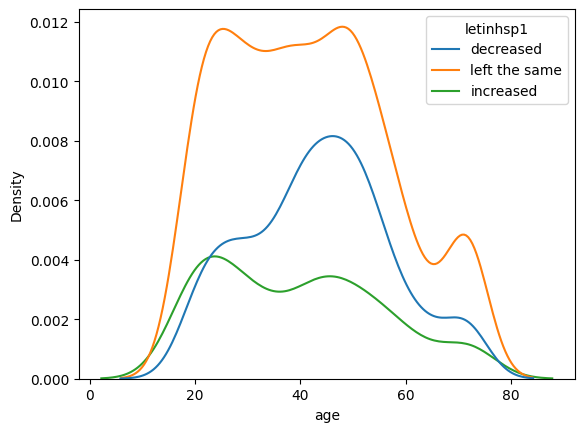

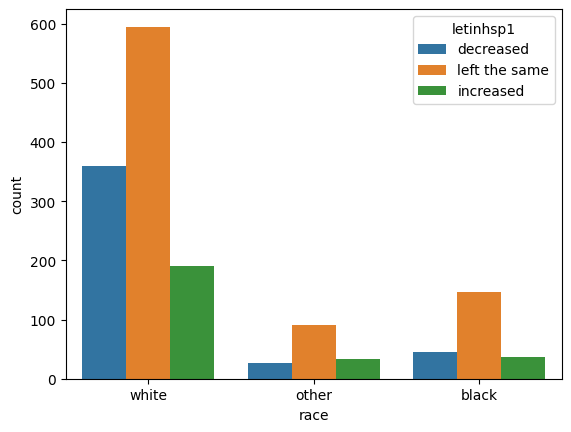

letinhsp1  decreased  increased  left the same
race                                          
black       0.200873   0.157205       0.641921
other       0.172185   0.225166       0.602649
white       0.313811   0.166084       0.520105 



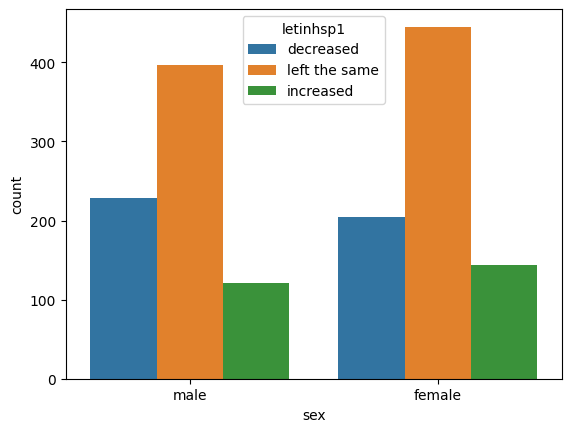

letinhsp1  decreased  increased  left the same
sex                                           
female      0.257251   0.181589       0.561160
male        0.306971   0.162198       0.530831 



In [26]:
#Let in hispanics data by age
sns.kdeplot(data=df, x='age', hue='letinhsp1')
plt.show()
#Let in hispanics data by race
sns.countplot(data=df, x='race', hue='letinhsp1',)
plt.show()
print(pd.crosstab(df['race'],df['letinhsp1'],normalize = 'index'),'\n')
#white
#decrease: 26.5%
#increase: 20.8%
#left same: 52.7%

#black:
#decrease: 14.4%
#increase: 18.9%
#left same: 66.7%
#other:
#decrease: 11.7%
#increase: 25.%
#left same: 63.3%

#Let in hispanics data by sex
sns.countplot(data=df, x='sex', hue='letinhsp1')
plt.show()
print(pd.crosstab(df['sex'],df['letinhsp1'],normalize = 'index'),'\n')

#female:
#decrease: 20.6%
#increase: 22.4%
#left same: 57%

#male
#decrease: 25%
#increase: 20%
#left same: 55.5%


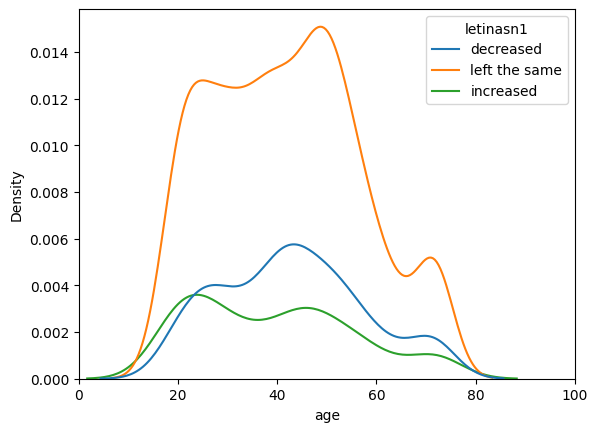

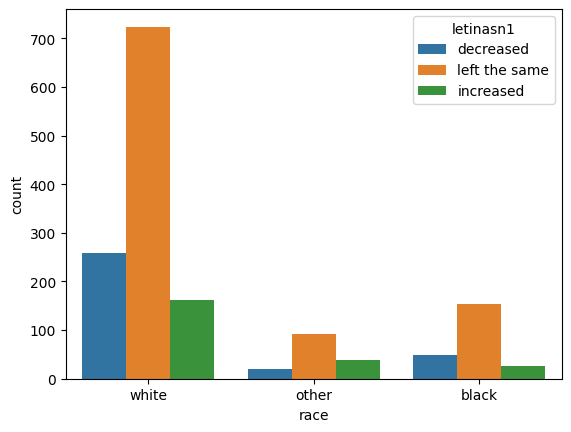

letinasn1  decreased  increased  left the same
race                                          
black       0.209607   0.117904       0.672489
other       0.139073   0.251656       0.609272
white       0.225524   0.141608       0.632867 



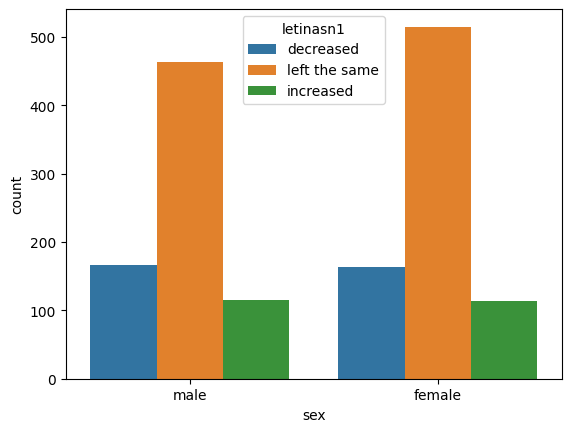

letinasn1  decreased  increased  left the same
sex                                           
female      0.206810   0.143758       0.649433
male        0.223861   0.154155       0.621984 



In [27]:
### letinasn1 (opinions about number of immigrants from Asia)
titanic = sns.load_dataset("titanic")

# set hue order so same colors as letinhsp1
hue_order = ['decreased', 'left the same', 'increased']

# letinasn1 by age
sns.kdeplot(data=df, x='age', hue='letinasn1', hue_order = hue_order)
plt.xlim(0, 100)
plt.show()

# letinasn1 by race
sns.countplot(data=df, x='race', hue='letinasn1', hue_order = hue_order)
plt.show()

# plotting by percent if we want that
# sns.countplot(data=df, x='race', hue='letinasn1', stat="percent", hue_order = hue_order)
# plt.show()

# output may be influenced by amount of each race in each sample
print(pd.crosstab(df['race'],df['letinasn1'],normalize = 'index'),'\n')

#white
#decrease: 22.6%
#increase: 14.2%
#left same: 63.3%

#black:
#decrease: 21.0%
#increase: 11.8%
#left same: 67.2%

#other:
#decrease: 13.9%
#increase: 25.2%
#left same: 61.0%

# letinasn1 by sex
sns.countplot(data=df, x='sex', hue='letinasn1', hue_order = hue_order)
plt.show()
print(pd.crosstab(df['sex'],df['letinasn1'],normalize = 'index'), '\n')

#female:
#decrease: 20.6%
#increase: 14.4%
#left same: 64.9%

#male
#decrease: 22.4%
#increase: 15.4%
#left same: 62.2%


array([65., 44., 72., 56., 63., 62., 35., 50., 39., 24., 27., 53., 36.,
       48., 20., 61., 42., 46., 47., 30., 26., 29., 22., 52., 51., 58.,
       23., 57., 45., 49., 34., 38., 28., 43., 70., 41., 19., 18., 37.,
       33., 31., 40., 55., 59., 21., 25., 32., 64., 60., 54., 71., 66.,
       67., 68.])